In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('tsv.csv')

df['date_of_infraction']= pd.to_datetime(df['date_of_infraction'])

df['Count Date'] = df['Count Date'].str.replace('*', '').str.replace(',', '')

df['Latitude'] = df['Latitude'].str.replace('*', '').str.replace(',', '')

df['Longitude'] = df['Longitude'].str.replace('*', '').str.replace(',', '')

df['Longitude'] = df['Longitude'].str.replace('*', '').str.replace(',', '')

df['8 Peak Hr Vehicle Volume'] = df['8 Peak Hr Vehicle Volume'].str.replace('*', '').str.replace(',', '')
df['8 Peak Hr Pedestrian Volume'] = df['8 Peak Hr Pedestrian Volume'].str.replace('*', '').str.replace(',', '')
df['Activation Date'] = df['Activation Date'].str.replace('*', '').str.replace(',', '')
df['TCS '] = df['TCS '].str.replace('*', '').str.replace(',', '')

df['Count Date']= pd.to_datetime(df['Count Date'])

df['Activation Date']= pd.to_datetime(df['Activation Date'])

df

df1 = df[['date_of_infraction','set_fine_amount','time_of_infraction','location2','Latitude','Longitude','Count Date','8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume']]

df1

df1['date_of_infraction_year'] = df1['date_of_infraction'].dt.year
df1['date_of_infraction_month'] = df1['date_of_infraction'].dt.month
df1['date_of_infraction_week'] = df1['date_of_infraction'].dt.week
df1['date_of_infraction_day'] = df1['date_of_infraction'].dt.day
df1['date_of_infraction_dayofweek'] = df1['date_of_infraction'].dt.dayofweek

df1['Count Date_year'] = df1['Count Date'].dt.year
df1['Count Date_month'] = df1['Count Date'].dt.month
df1['Count Date_week'] = df1['Count Date'].dt.week
df1['Count Date_day'] = df1['Count Date'].dt.day
df1['Count Date_dayofweek'] = df1['Count Date'].dt.dayofweek

df1

df1 = df1.drop('date_of_infraction',axis = 1)
df1 = df1.drop('Count Date',axis = 1)
df1 = df1.drop('location2',axis = 1)


df1 = df1.dropna(how='all')

df1["8 Peak Hr Vehicle Volume"] = df1["8 Peak Hr Vehicle Volume"].astype(str).astype(int)

df1["8 Peak Hr Pedestrian Volume"] = df1["8 Peak Hr Pedestrian Volume"].astype(str).astype(int)

df1['hour_sin'] = np.sin(2 * np.pi * df1['time_of_infraction']/23.0)


df1['hour_cos'] = np.cos(2 * np.pi * df1['time_of_infraction']/23.0)


df1["Latitude"] = df1.Latitude.astype(float)


df1["Longitude"] = df1.Latitude.astype(float)


np.where(df1.values >= np.finfo(np.float64).max)


df1 = df1.dropna() 

pd.isnull(df1).sum() > 0

X=df1.drop(columns=['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume'])
y= df1[['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

!pip install tensorflow

!pip install keras

/home/ec2-user/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/ipykernel/__main__.py:32: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().we

In [2]:
df1.columns

Index(['set_fine_amount', 'time_of_infraction', 'Latitude', 'Longitude',
       '8 Peak Hr Vehicle Volume', '8 Peak Hr Pedestrian Volume',
       'date_of_infraction_year', 'date_of_infraction_month',
       'date_of_infraction_week', 'date_of_infraction_day',
       'date_of_infraction_dayofweek', 'Count Date_year', 'Count Date_month',
       'Count Date_week', 'Count Date_day', 'Count Date_dayofweek', 'hour_sin',
       'hour_cos'],
      dtype='object')

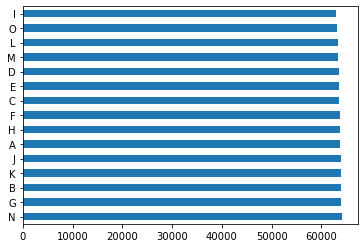

In [5]:
#Creating bins for different sets
bin_names1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
df1['Level']=pd.qcut(df1['time_of_infraction'],15,labels=bin_names1)
#Plotting number of datapoints in each bin.
df1['Level'].value_counts().plot(kind='barh')
E=df1.loc[df1['Level']=='G']
E=E.drop(columns='Level')

In [7]:
X=E.drop(columns=['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume'])
y= E[['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume']]

In [6]:
E

,set_fine_amount,time_of_infraction,Latitude,Longitude,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume,date_of_infraction_year,date_of_infraction_month,date_of_infraction_week,date_of_infraction_day,date_of_infraction_dayofweek,Count Date_year,Count Date_month,Count Date_week,Count Date_day,Count Date_dayofweek,hour_sin,hour_cos
1257,30,1035.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,-3.916394e-15,1.000000
1258,50,1036.0,43.775760,43.775760,13825,534,1970,1,1,1,3,2016,3,12,21,0,2.697968e-01,0.962917
1259,40,1036.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,2.697968e-01,0.962917
1260,40,1037.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,5.195840e-01,0.854419
1261,30,1039.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,8.878852e-01,0.460065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954192,50,1134.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,9.422609e-01,-0.334880
954193,40,1134.0,43.636616,43.636616,5781,1156,1970,1,1,1,3,2012,2,8,22,2,9.422609e-01,-0.334880
954194,50,1134.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,9.422609e-01,-0.334880
954195,50,1134.0,43.818187,43.818187,1982,16,1970,1,1,1,3,2009,7,30,26,6,9.422609e-01,-0.334880


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [8]:
#Scaling the bin and obtaining the scores for the pca analysis.
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Importing All major The Necessary Packages
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 
E_index= E.index
EE= StandardScaler().fit_transform(E)
pca = PCA(n_components=3, svd_solver='full')
PC_scores = pca.fit_transform(EE)
scores_pd = pd.DataFrame(data = PC_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index =E_index)

In [10]:
df2 = pd.DataFrame(data = EE,columns = E.columns)

In [12]:
X=df2.drop(columns=['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume'])
y= df2[['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume']]

In [11]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = df1.columns)

In [12]:
#PLotting the PCA plot fucntion
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
        plt.text(x, y, label, ha='center', size=11)
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

In [5]:
X=df2.drop(columns=['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume'])
y= df2[['8 Peak Hr Vehicle Volume','8 Peak Hr Pedestrian Volume']]

In [13]:
# example of evaluating direct multioutput regression with an SVM model
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
# define dataset
# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.265 (0.007)


In [14]:
import pickle
filename = 'linearsvr_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [15]:
from numpy import array, hstack, math
from numpy.random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

In [18]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.15)
print("xtrain:", xtrain.shape, "ytrian:", ytrain.shape)
print("xtest:", xtest.shape, "ytest:", ytest.shape)


xtrain: (54420, 16) ytrian: (54420, 2)
xtest: (9604, 16) ytest: (9604, 2)


In [19]:
gbr = GradientBoostingRegressor()
model = MultiOutputRegressor(estimator=gbr)
print(model)

MultiOutputRegressor(estimator=GradientBoostingRegressor())


In [20]:
model.fit(xtrain, ytrain)
score = model.score(xtrain, ytrain)
print("Training score:", score)

Training score: 0.9402209323397664


In [23]:
ypred = model.predict(xtest)

In [25]:
ypred

array([[-0.64666496, -0.37856473],
       [-0.64666496, -0.37856473],
       [-0.64666496, -0.37856473],
       ...,
       [-0.64666496, -0.37856473],
       [-0.01756073,  0.30573911],
       [-0.01756073,  0.30573911]])